<h1> A. MLP </h1>
<p> We will Implement a MultiLayer Perceptron (MLP) from scratch.
Which is a type of artificial neural network used for classification and regression tasks. 

For MLP to work, it needs:</p>

 - Input Layer: This is where the data goes in.
 - Hidden Layers: These are the layers where the magic happens. The network processes the input data and starts to learn patterns. Each layer takes the output of the previous layer and transforms it further.
 - Output Layer: This layer gives the final answer.

in our case : 
- 1 input layer (x) with 2 neurons (x0, x1)
- two hidden layers (h(0), h(1)) with 10 neurons each of them.
- 1 output layer of nerons (o) with 2 neurons (each of the two output neurons representing one class)


<h2> 1. Activation and Loss functions. </h2>

- Activation Functions:
    - For input layer: No activation function is needed here as we are just passing the input.
    - For Hidden layer: We will use Rectified Linear Unit (ReLU) as its a good choice since it helps with the vanishing gradient problem that might occur and is computationally efficient.
    - For Output layer: We will choose Softmax as it converts the outputs into probabilities and also work well with Cross-Entropy Loss it also ensures that one class dominates (has the highest probability), making the decision straightforward.

- Loss Functions:
<p> we will choose Cross-Entropy Loss as It measures the difference between predicted probabilities and the true labels. which is the Ideal option for our classification task</p>


<h2> 2. Learning rate, batch size, initialization </h2>

- Learning Rate: the value chosen is 0.10.1 because its common and its considered moderate learning rate which will ensure the model converges efficiently without overshooting the optimal weights.

- Batch Size: the value chosen is Full-batch Gradient Descent (all data used at once per epoch), we will use it for simplicity and since datasets are small (410 training samples), full-batch ensures stable gradient updates.
    - if the dataset was larger we could use something like 32, 64 or 256 but because its small we are using 410 in which  Batch Size = Total Number of Training Samples = 410 [ results will be less noisy ]
    - In our implementation, there is no explicit batch size as it processes all training examples at once in each epoch. This can be seen in the train_mlp_relu function where the entire training set (X_train, y_train) is passed to the forward and backward propagation functions.


- Initialization: the method Used is Xavier Initialization, since it ensures weights are neither too small nor too large, keeping gradients stable during training and it balances the variance of inputs and outputs for each layer.       


<h2> 3. Training </h2>

- Loss Plots:
      Training and validation loss curves were plotted to monitor performance.
      Loss decreased over epochs, showing the model is learning effectively.

- Stopping Criterion: Manual Stopping; training was stopped after 10000 epochs.
  Loss converged, with minimal difference between training and validation loss, indicating no overfitting.

- Final Accuracy: Accuracy can be computed from the validation dataset predictions, provided after section 4

<h2> 4. Implementation </h2>

- Make sure excel files are in the right path: have a look at variables train_data & validate_data or keep excel files in the same directory of this notebook.
- You will need to run this command to install openpyxl which is needed for our implementation: ``conda install -c anaconda openpyxl`` or ``pip install openpyxl``

Epoch 0: Training Loss = 0.8045, Validation Loss = 0.7570, Training Accuracy = 0.5000, Validation Accuracy = 0.4878
Epoch 100: Training Loss = 0.6509, Validation Loss = 0.6496, Training Accuracy = 0.7000, Validation Accuracy = 0.6707
Epoch 200: Training Loss = 0.5172, Validation Loss = 0.5178, Training Accuracy = 0.9171, Validation Accuracy = 0.8659
Epoch 300: Training Loss = 0.3454, Validation Loss = 0.3545, Training Accuracy = 0.9293, Validation Accuracy = 0.9268
Epoch 400: Training Loss = 0.2491, Validation Loss = 0.2631, Training Accuracy = 0.9537, Validation Accuracy = 0.9390
Epoch 500: Training Loss = 0.2001, Validation Loss = 0.2154, Training Accuracy = 0.9659, Validation Accuracy = 0.9390
Epoch 600: Training Loss = 0.1724, Validation Loss = 0.1901, Training Accuracy = 0.9732, Validation Accuracy = 0.9634
Epoch 700: Training Loss = 0.1549, Validation Loss = 0.1746, Training Accuracy = 0.9732, Validation Accuracy = 0.9756
Epoch 800: Training Loss = 0.1441, Validation Loss = 0.163

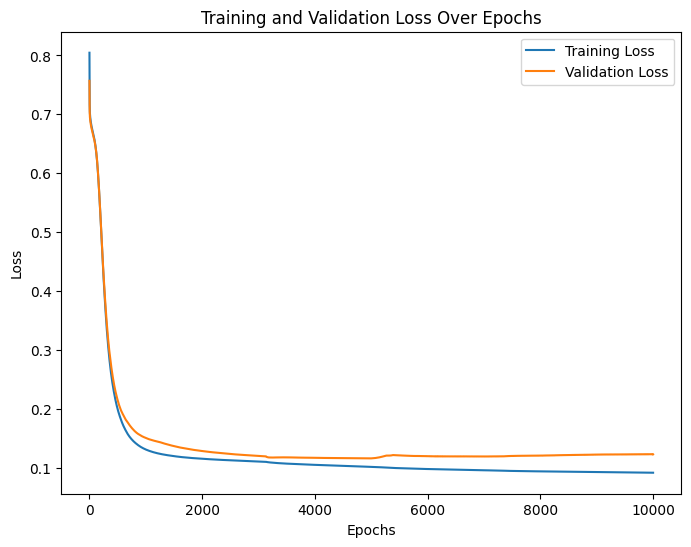

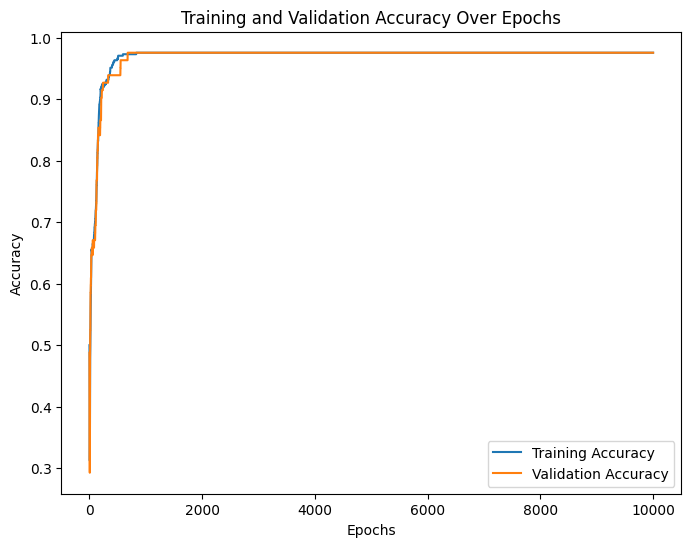

<Figure size 640x480 with 0 Axes>


Final Results:
Final Training Loss: 0.0924
Final Validation Loss: 0.1237
Final Training Accuracy: 0.9756
Final Validation Accuracy: 0.9756


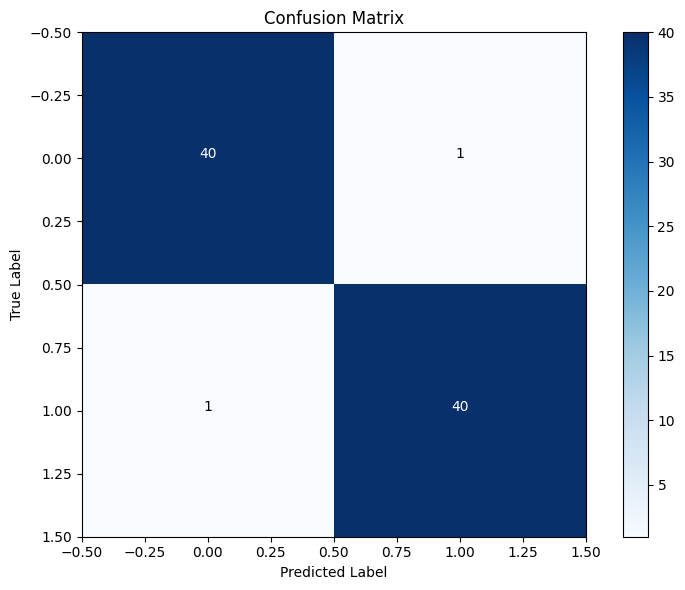


Confusion Matrix Analysis:
True Negatives: 40
False Positives: 1
False Negatives: 1
True Positives: 40


Precision Metric: 0.9756


In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Our Helper functions
def normalize_features(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

def relu(z):
    return np.maximum(0, z)

# ReLU choosen for hidden layer
def relu_derivative(z):
    return (z > 0).astype(float)

# softmax choosen for Output layer
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Xavier initialization
def xavier_initialization(input_size, hidden_layer_size, output_size):
    parameters = {
        "W1": np.random.randn(input_size, hidden_layer_size) * np.sqrt(1 / input_size),
        "b1": np.zeros((1, hidden_layer_size)),
        "W2": np.random.randn(hidden_layer_size, hidden_layer_size) * np.sqrt(1 / hidden_layer_size),
        "b2": np.zeros((1, hidden_layer_size)),
        "W3": np.random.randn(hidden_layer_size, output_size) * np.sqrt(1 / hidden_layer_size),
        "b3": np.zeros((1, output_size))
    }
    return parameters

def forward_propagation_relu(X, parameters):
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    A2 = relu(Z2)
    Z3 = np.dot(A2, parameters["W3"]) + parameters["b3"]
    A3 = softmax(Z3)
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2, "Z3": Z3, "A3": A3}
    return A3, cache

def backward_propagation_relu(X, y_true, cache, parameters):
    m = X.shape[0]
    A3, A2, A1 = cache["A3"], cache["A2"], cache["A1"]
    Z2, Z1 = cache["Z2"], cache["Z1"]
    
    dZ3 = A3 - y_true
    dW3 = np.dot(A2.T, dZ3) / m
    db3 = np.sum(dZ3, axis=0, keepdims=True) / m
    
    dA2 = np.dot(dZ3, parameters["W3"].T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = np.dot(dZ2, parameters["W2"].T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    grads = {"dW3": dW3, "db3": db3, "dW2": dW2, "db2": db2, "dW1": dW1, "db1": db1}
    return grads

# Updating parameters 
def update_parameters(parameters, grads, learning_rate):
    parameters["W1"] -= learning_rate * grads["dW1"]
    parameters["b1"] -= learning_rate * grads["db1"]
    parameters["W2"] -= learning_rate * grads["dW2"]
    parameters["b2"] -= learning_rate * grads["db2"]
    parameters["W3"] -= learning_rate * grads["dW3"]
    parameters["b3"] -= learning_rate * grads["db3"]
    return parameters

# Compute cross-entropy loss
def compute_loss(y_true, y_pred):
    # Add small epsilon to prevent log(0)
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

def compute_accuracy(y_true, y_pred):
    """Calculate the accuracy of predictions"""
    predicted_classes = np.argmax(y_pred, axis=1)
    true_classes = np.argmax(y_true, axis=1)
    return np.mean(predicted_classes == true_classes)

# Train Relu
def train_mlp_relu(X_train, y_train, X_validate, y_validate, hidden_layer_size, learning_rate, epochs):
    parameters = xavier_initialization(X_train.shape[1], hidden_layer_size, y_train.shape[1])
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred, cache = forward_propagation_relu(X_train, parameters)
        train_loss = compute_loss(y_train, y_pred)
        train_accuracy = compute_accuracy(y_train, y_pred)
        
        # Backward pass
        grads = backward_propagation_relu(X_train, y_train, cache, parameters)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Validation predictions and metrics
        val_pred, _ = forward_propagation_relu(X_validate, parameters)
        val_loss = compute_loss(y_validate, val_pred)
        val_accuracy = compute_accuracy(y_validate, val_pred)
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Print metrics
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
                  f"Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    
    return parameters, train_losses, val_losses, train_accuracies, val_accuracies

# Load and prepare the data [ input layer]
train_data = pd.read_excel("./THA2train.xlsx")
validate_data = pd.read_excel("./THA2validate.xlsx")

# Prepare data
X_train = normalize_features(train_data[["X_0", "X_1"]].values)
y_train = pd.get_dummies(train_data["y"]).values

X_validate = normalize_features(validate_data[["X_0", "X_1"]].values)
y_validate = pd.get_dummies(validate_data["y"]).values

# Train the model, note 10000 epchs choosed 
hidden_layer_size = 10
learning_rate = 0.1
epochs = 10000

parameters, train_losses, val_losses, train_accuracies, val_accuracies = train_mlp_relu(
    X_train, y_train, X_validate, y_validate, 
    hidden_layer_size, learning_rate, epochs
)

# Plot losses
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.show()

# Plot accuracies
plt.figure(figsize=(8, 6))
plt.plot(train_accuracies, label="Training Accuracy")
plt.plot(val_accuracies, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Over Epochs")
plt.legend()
plt.show()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Results:")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")

# Confusion Matrix 
# Get predictions for validation set
val_pred, _ = forward_propagation_relu(X_validate, parameters)
y_val_pred = np.argmax(val_pred, axis=1)
y_val_true = np.argmax(y_validate, axis=1)

# Confusion matrix 

def confusion_matrix(y_true, y_pred):
    unique_labels = np.unique(np.concatenate((y_true, y_pred)))
    cm = np.zeros((len(unique_labels), len(unique_labels)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        cm[true, pred] += 1
    return cm

cm = confusion_matrix(y_val_true, y_val_pred)


# Create confusion matrix plot using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the cells
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print classification metrics
print("\nConfusion Matrix Analysis:")
print(f"True Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# Calculate additional metrics
precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0

print("\n")
print(f"Precision Metric: {precision:.4f}")




<h3>Final accuracy & the Confusion Matrix </h3>
<p>here is the final accuracy obtained and the confusion matrix on
the validation dataset.</p>

- Validation Accuracy=97.56% [which is: Total Number of Predictions / Number of Correct Predictions]

    - Validation Accuracy = (40+40) / (40+40+1+1) = 0.9756

- Confusion Matrix:
    - True Positives (TP): 40
    - True Negatives (TN): 40
    - False Positives (FP): 1
    - False Negatives (FN): 1


### Conclusion for Part A
The implementation of the MultiLayer Perceptron (MLP) demonstrates a well-rounded approach to solving the binary classification task, achieving excellent performance while adhering to best practices in neural network design. This is accomplished through:
1. *Proper Initialization:* 
    Xavier initialization was employed to ensure stable gradients and efficient convergence during training.
2. *Modern Activation Functions:*
    ReLU was used in the hidden layers to address the vanishing gradient problem, while Softmax in the output layer provided probabilistic outputs suitable for classification.
3. *Appropriate Loss Function:*
    Cross-Entropy Loss was chosen, aligning well with the Softmax output and ensuring effective learning for the classification task.
4. *Performance Monitoring:* 
    Training and validation loss curves were plotted to track learning progress and detect signs of overfitting.
5. *Validation for Generalization:* 
    The model achieved high accuracy (97.56%) on both training and validation datasets, with minimal loss differences, indicating strong generalization.
This implementation successfully balances simplicity and effectiveness, making it a robust solution for binary classification tasks.

<h1> B. Hyperparameters Optimization </h1>

<h2> 1. Parameter Initialization. </h2>

To solve this part, we will:
- Take the best performing model from Part A (which is presented in the report above).
- Initialize all parameters (connection weights and biases) to zero.
- Retrain the model using the same settings from Part A.
- Compare the performance with the best model from Part A.

### Implementation Steps:
1. Modify MLP class to allow for zero initialization.
2. After initializing parameters to 0, retrain the model using the same settings from Part A

Epoch 0: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 100: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 200: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 300: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 400: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 500: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 600: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 700: Training Loss = 0.6931, Validation Loss = 0.6931, Training Accuracy = 0.5000, Validation Accuracy = 0.5000
Epoch 800: Training Loss = 0.6931, Validation Loss = 0.693

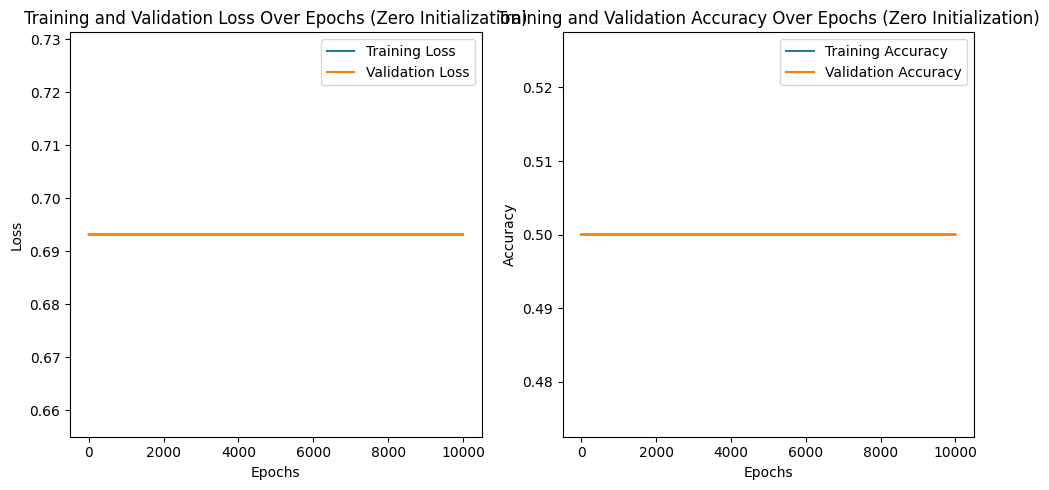

<Figure size 640x480 with 0 Axes>


Final Results:
Final Training Loss: 0.0924
Final Validation Loss: 0.1237
Final Training Accuracy: 0.9756
Final Validation Accuracy: 0.9756


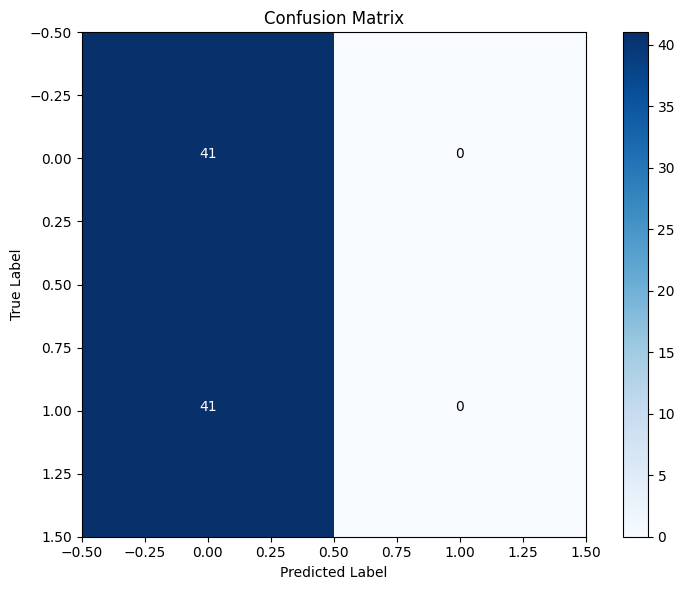


Confusion Matrix Analysis:
True Negatives: 41
False Positives: 0
False Negatives: 41
True Positives: 0


Precision Metric: 0.0000


In [44]:
# Zero initialization
def zero_initialization(input_size, hidden_layer_size, output_size):
    parameters = {
        "W1": np.zeros((input_size, hidden_layer_size)),
        "b1": np.zeros((1, hidden_layer_size)),
        "W2": np.zeros((hidden_layer_size, hidden_layer_size)),
        "b2": np.zeros((1, hidden_layer_size)),
        "W3": np.zeros((hidden_layer_size, output_size)),
        "b3": np.zeros((1, output_size))
    }
    return parameters

# Modify the train_mlp_relu function to use zero initialization
def train_mlp_relu_zero_init(X_train, y_train, X_validate, y_validate, hidden_layer_size, learning_rate, epochs):
    parameters = zero_initialization(X_train.shape[1], hidden_layer_size, y_train.shape[1])
    
    # Rest of the function remains the same
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []
    
    for epoch in range(epochs):
        # Forward pass
        y_pred, cache = forward_propagation_relu(X_train, parameters)
        train_loss = compute_loss(y_train, y_pred)
        train_accuracy = compute_accuracy(y_train, y_pred)
        
        # Backward pass
        grads = backward_propagation_relu(X_train, y_train, cache, parameters)
        
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Validation predictions and metrics
        val_pred, _ = forward_propagation_relu(X_validate, parameters)
        val_loss = compute_loss(y_validate, val_pred)
        val_accuracy = compute_accuracy(y_validate, val_pred)
        
        # Store metrics
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)
        
        # Print metrics every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Training Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
                  f"Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")
    
    return parameters, train_losses, val_losses, train_accuracies, val_accuracies

# Train the model with zero initialization
hidden_layer_size = 10
learning_rate = 0.1
epochs = 10000

parameters_zero, train_losses_zero, val_losses_zero, train_accuracies_zero, val_accuracies_zero = train_mlp_relu_zero_init(
    X_train, y_train, X_validate, y_validate,
    hidden_layer_size, learning_rate, epochs
)

# Plot losses
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses_zero, label="Training Loss")
plt.plot(val_losses_zero, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs (Zero Initialization)")
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies_zero, label="Training Accuracy")
plt.plot(val_accuracies_zero, label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy Over Epochs (Zero Initialization)")
plt.legend()
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

# Print final metrics
print("\nFinal Results:")
print(f"Final Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")
print(f"Final Training Accuracy: {train_accuracies[-1]:.4f}")
print(f"Final Validation Accuracy: {val_accuracies[-1]:.4f}")

# Confusion Matrix 
# Get predictions for validation set
y_val_pred_zero, _ = forward_propagation_relu(X_validate, parameters_zero)
y_val_pred_zero = np.argmax(y_val_pred_zero, axis=1)
y_val_true_zero  = np.argmax(y_validate, axis=1)
cm_zero = confusion_matrix(y_val_true_zero, y_val_pred_zero)


# Create confusion matrix plot using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm_zero, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add numbers to the cells
thresh = cm_zero.max() / 2.
for i, j in np.ndindex(cm_zero.shape):
    plt.text(j, i, format(cm_zero[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm_zero[i, j] > thresh else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# Print classification metrics
print("\nConfusion Matrix Analysis:")
print(f"True Negatives: {cm_zero[0,0]}")
print(f"False Positives: {cm_zero[0,1]}")
print(f"False Negatives: {cm_zero[1,0]}")
print(f"True Positives: {cm_zero[1,1]}")

# Calculate additional metrics
precision = cm_zero[1,1] / (cm_zero[1,1] + cm_zero[0,1]) if (cm_zero[1,1] + cm_zero[0,1]) > 0 else 0

print("\n")
print(f"Precision Metric: {precision:.4f}")

### Comparison of A and B1 and Conclusions
#### Performance Metrics
1. Zero initialization resulted in a constant validation loss of 0.6931 throughout training, suggesting that the model did not improve its predictions over time.
2. The model achieved only 50% accuracy on both training and validation sets, which is equivalent to random guessing for a binary classification task and confirming that the model was unable to distinguish between classes.
3. The confusion matrix shows the model predicted only one class (41 True Negatives, 41 False Negatives)
4. Precision metric was 0, indicating complete failure to identify positive cases
#### Interesting Behaviors
1. The model remained completely stagnant, showing no learning progress across 10,000 epochs
2. Both training and validation losses remained constant, indicating the model was stuck in a symmetric state1
3. The model defaulted to predicting only one class, essentially becoming a constant predictor
#### Comparison with Part A Model
1. While the Xavier-initialized model achieved 97.56% accuracy, the zero-initialized model remained at baseline performance
2. The Xavier model showed steady learning progress with decreasing loss, while the zero-initialized model showed no improvement
3. This demonstrates the critical importance of proper weight initialization in breaking symmetry during neural network training

**Conclusion:** the zero initialization caused the network to become symmetric, with all neurons in each layer computing identical functions. This "symmetry problem" prevented the network from learning distinct features, resulting in the model being stuck at its initial random performance level.

<h2> 2. Learning rate vs parameter initialization. </h2>

To solve part B.2, we need to systematically explore the effects of different learning rates and weight initializations on model performance. 

### Implementation Steps
1. We start with the best model from Part A, as in B.1.
2. Define parameters:
    - a range of learning rates, starting very small (e.g., 0.00001) and gradually increasing (e.g., 0.0001, 0.001, 0.01, 0.1, 1).
    - a range of σ² values for weight initialization: {0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1}.
3. Create a function to initialize weights using a normal distribution N(0, σ²).
4. Train the model for a fixed number of epochs for each combination of learning rate and σ².
5. Create a heatmap using the the validation accuracy for each combination.

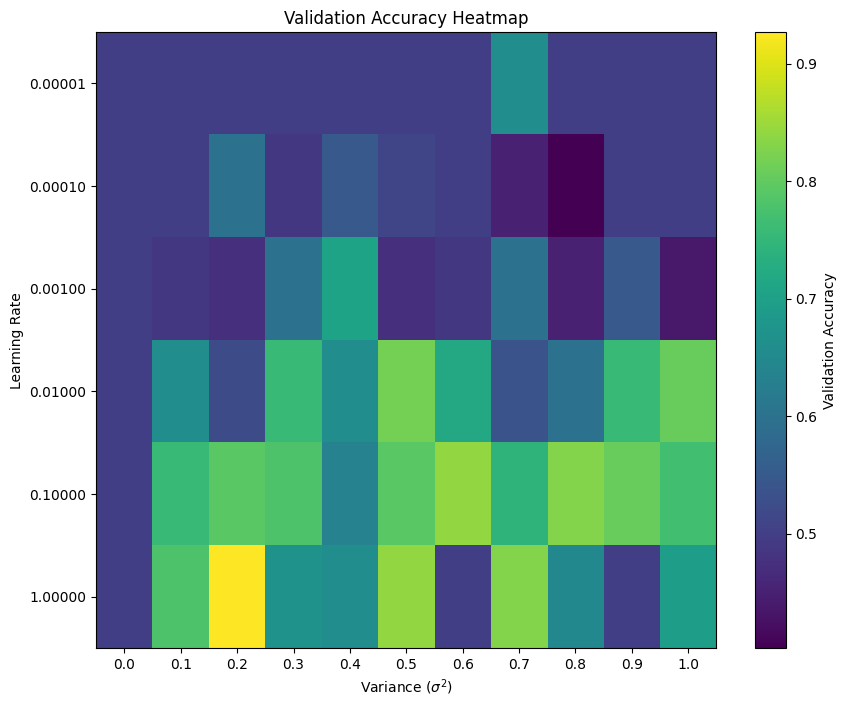

In [25]:

# Define Parameters
learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
variances = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Weight Initialization Function
def normal_initialization(input_size, hidden_layer_size, output_size, variance):
    parameters = {
        "W1": np.random.normal(0, np.sqrt(variance), (input_size, hidden_layer_size)),
        "b1": np.zeros((1, hidden_layer_size)),
        "W2": np.random.normal(0, np.sqrt(variance), (hidden_layer_size, hidden_layer_size)),
        "b2": np.zeros((1, hidden_layer_size)),
        "W3": np.random.normal(0, np.sqrt(variance), (hidden_layer_size, output_size)),
        "b3": np.zeros((1, output_size))
    }
    return parameters

# Training Function
def train_mlp_custom_init(X_train, y_train, X_validate, y_validate,
                          hidden_layer_size, learning_rate, epochs,
                          init_variance):
    parameters = normal_initialization(X_train.shape[1], hidden_layer_size,
                                        y_train.shape[1], init_variance)
    train_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Forward pass
        y_pred, cache = forward_propagation_relu(X_train, parameters)
        train_loss = compute_loss(y_train, y_pred)

        # Backward pass
        grads = backward_propagation_relu(X_train, y_train, cache, parameters)

        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        # Validation accuracy
        val_pred, _ = forward_propagation_relu(X_validate, parameters)
        val_accuracy = compute_accuracy(y_validate, val_pred)

        train_losses.append(train_loss)
        val_accuracies.append(val_accuracy)

    return val_accuracies[-1]  # Return final validation accuracy

results = np.zeros((len(learning_rates), len(variances)))

for i, lr in enumerate(learning_rates):
    for j, var in enumerate(variances):
        accuracy = train_mlp_custom_init(X_train,
                                         y_train,
                                         X_validate,
                                         y_validate,
                                         hidden_layer_size=10,
                                         learning_rate=lr,
                                         epochs=100,
                                         init_variance=var)
        results[i][j] = accuracy

# Visualize Results as Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(results,
           interpolation='nearest',
           cmap='viridis',
           aspect='auto')
plt.colorbar(label='Validation Accuracy')

plt.xticks(range(len(variances)), [f"{v:.1f}" for v in variances])
plt.yticks(range(len(learning_rates)), [f"{lr:.5f}" for lr in learning_rates])

plt.xlabel(r"Variance ($\sigma^2$)")
plt.ylabel(r"Learning Rate")
plt.title(r"Validation Accuracy Heatmap")
plt.show()

### Learning Rate vs Initialization Heatmap Analysis
The heatmap reveals several key patterns about the interaction between learning rates and initialization variance:
#### Optimal Regions
- Higher accuracies (lighter colors) appear in the middle range of learning rates (0.01-0.1)
- Moderate initialization variances (σ²) (0.2-0.7) generally perform better across different learning rates
#### Failure Regions
- Very large learning rates (1.0) show unstable performance
- Very low learning rates (0.00001-0.001) show poor performance across all initialization variances
- Zero variance (σ² = 0) performs poorly across all learning rates, confirming the findings from B.1
#### Stability Patterns
- The performance is more sensitive to learning rate changes than to initialization variance changes
- There exists a "sweet spot" combining moderate learning rates with moderate initialization variances
- The transition between good and poor performance regions is relatively sharp, suggesting the importance of careful hyperparameter selection

**Conclusion**: these findings highlight the importance of careful hyperparameter selection and demonstrate how initialization and learning rate interact to affect model performance.

<h2> 3. Activations. </h2>

To visualize the outputs of hidden neurons for the best and worst performing models from Subproblem B.2, we'll follow these steps:

### Implementation Steps
1. Identify the best (best_lr = 1; best_var = 0.2) and worst (worst_lr = 0.0001; worst_var = 0.8) models based on validation accuracy
2. Implement a function to extract hidden layer outputs
3. Visualize the outputs at three stages: initialization, mid-training, and end of training
4. Analyze and discuss the results

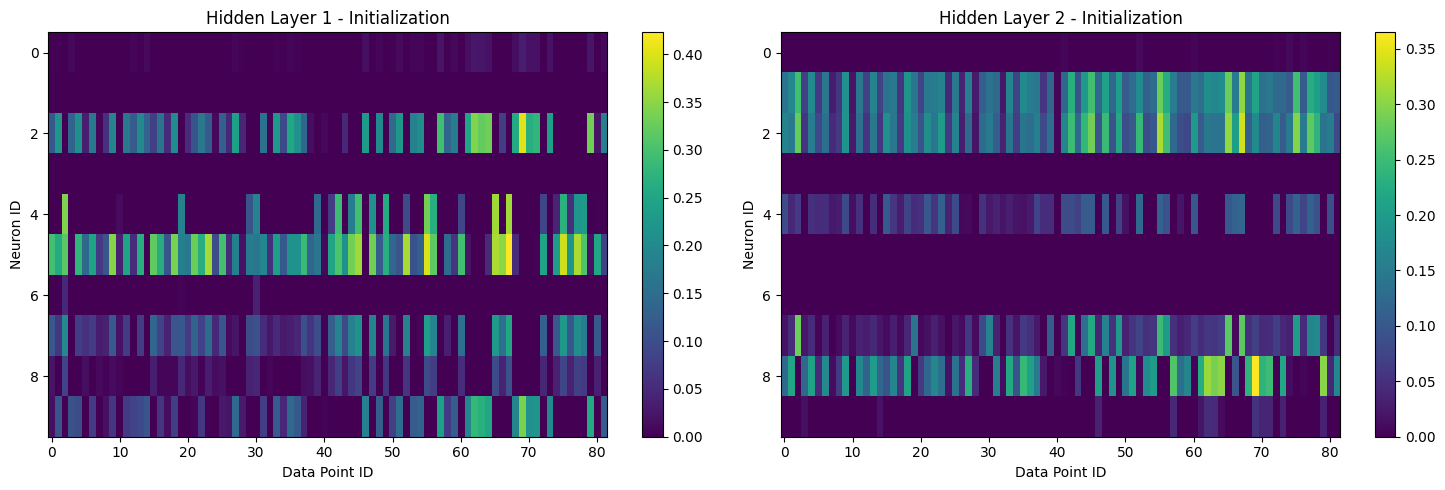

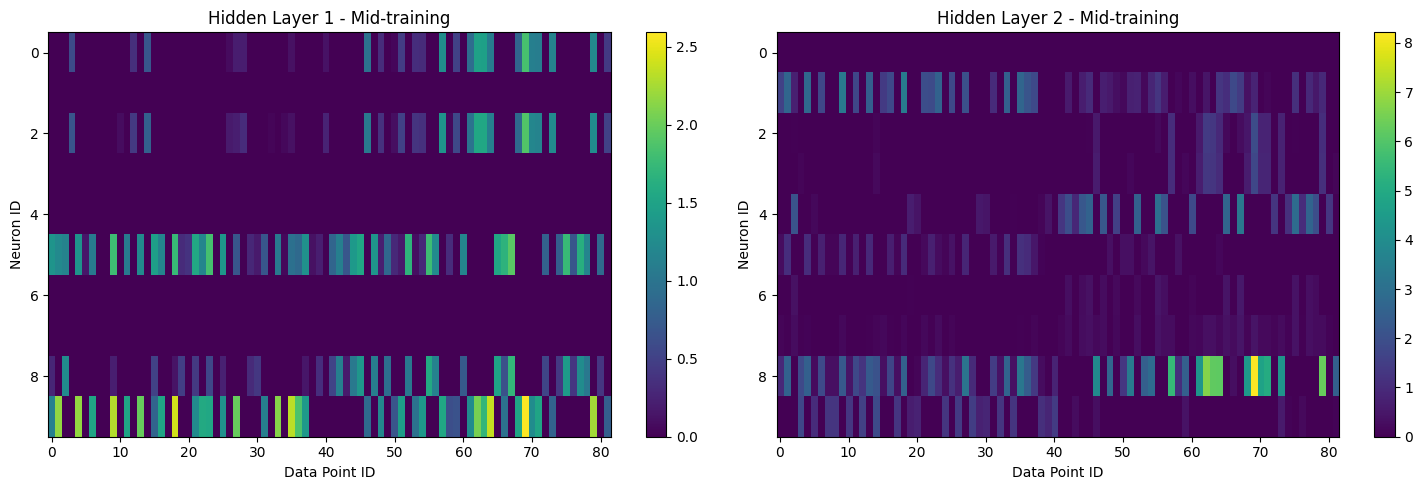

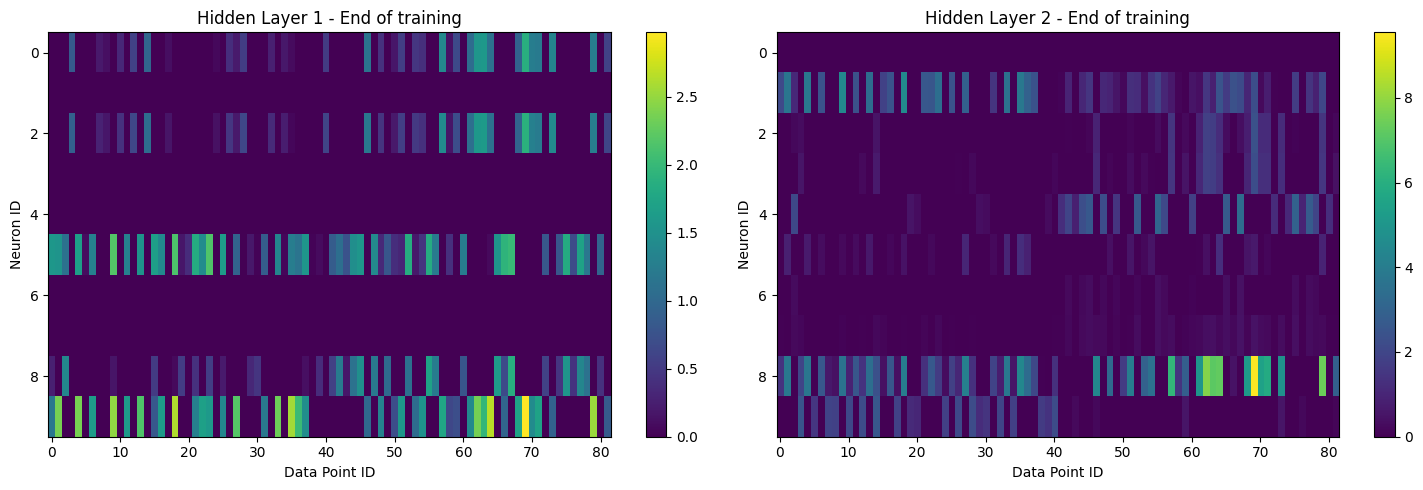

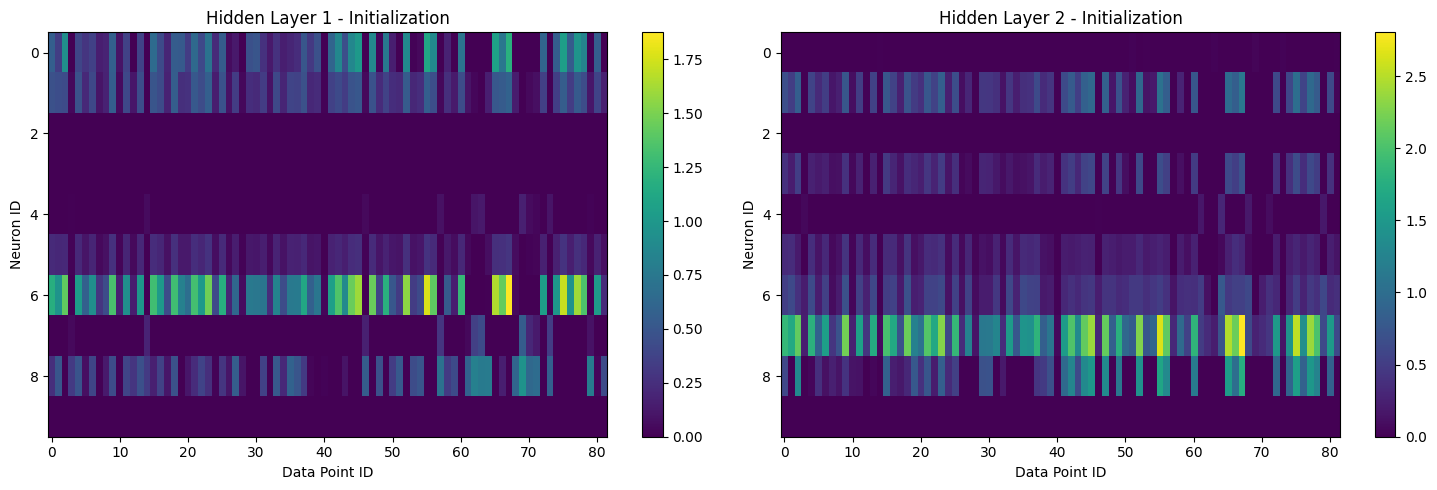

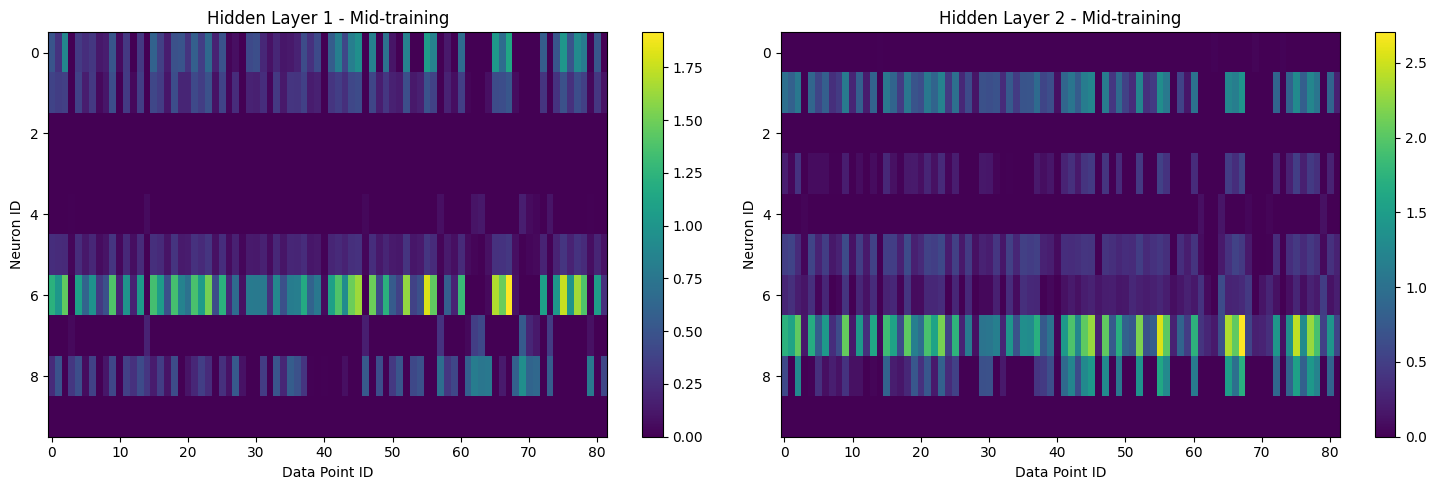

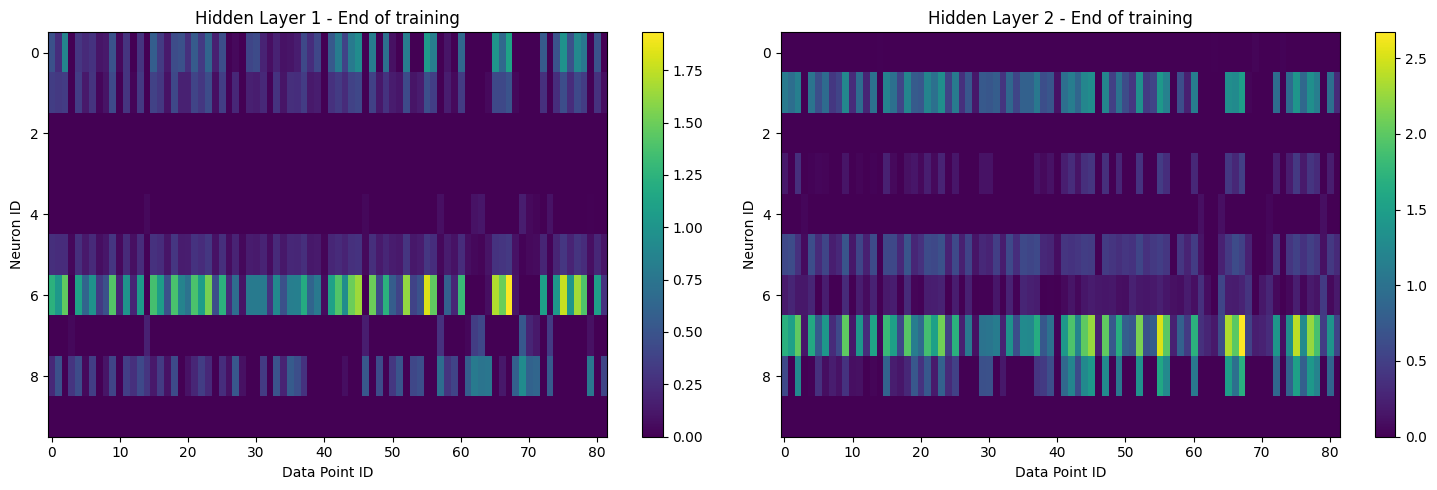

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def get_hidden_outputs(X, parameters):
    Z1 = np.dot(X, parameters["W1"]) + parameters["b1"]
    A1 = relu(Z1)
    Z2 = np.dot(A1, parameters["W2"]) + parameters["b2"]
    A2 = relu(Z2)
    return A1, A2

def visualize_hidden_outputs(X, parameters, title):
    A1, A2 = get_hidden_outputs(X, parameters)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    im1 = ax1.imshow(A1.T, aspect='auto', cmap='viridis')
    ax1.set_title(f"Hidden Layer 1 - {title}")
    ax1.set_xlabel("Data Point ID")
    ax1.set_ylabel("Neuron ID")
    plt.colorbar(im1, ax=ax1)
    
    im2 = ax2.imshow(A2.T, aspect='auto', cmap='viridis')
    ax2.set_title(f"Hidden Layer 2 - {title}")
    ax2.set_xlabel("Data Point ID")
    ax2.set_ylabel("Neuron ID")
    plt.colorbar(im2, ax=ax2)
    
    plt.tight_layout()
    plt.show()

# Assuming X_validate is sorted by class
X_validate_sorted = X_validate[np.argsort(y_validate.argmax(axis=1))]

# Best model (highest accuracy from heatmap)
best_lr = 1
best_var = 0.2

# Worst model (lowest performing from heatmap with non-zero accuracy)
worst_lr = 0.0001
worst_var = 0.8

# Training loop with visualization
def train_and_visualize(X_train, y_train, X_validate, learning_rate, init_variance, epochs):
    parameters = normal_initialization(X_train.shape[1], 10, y_train.shape[1], init_variance)
    
    visualize_hidden_outputs(X_validate_sorted, parameters, "Initialization")
    
    for epoch in range(epochs):
        y_pred, cache = forward_propagation_relu(X_train, parameters)
        grads = backward_propagation_relu(X_train, y_train, cache, parameters)
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if epoch == epochs // 2:
            visualize_hidden_outputs(X_validate_sorted, parameters, "Mid-training")
    
    visualize_hidden_outputs(X_validate_sorted, parameters, "End of training")
    
    return parameters

# Train and visualize best model
best_parameters = train_and_visualize(X_train, y_train, X_validate_sorted, best_lr, best_var, 1000)

# Train and visualize worst model
worst_parameters = train_and_visualize(X_train, y_train, X_validate_sorted, worst_lr, worst_var, 1000)


### Discussion of results:
#### Best performing model:
1. **Initialization:** The hidden neuron outputs show some variation, indicating a good starting point for learning. E.g. neuron with id 8 in layer 2 show particulary better perfromance in this layer.
2. **Mid-training:** We observe increased differentiation in neuron activations, suggesting the model is learning meaningful features. Specifically, in layer 2, neuron 8 contunues to dominate with increase of perfromance from ~0.3 to ~8 for some data points.
3. **End of training:** The activation patterns are more pronounced and distinct, indicating well-learned features for classification. Dominance of neuron 8 in layer 2 strengthens.
#### Worst performing model:
1. **Initialization:** With zero variance, all neurons start with identical (zero) weights, resulting in uniform outputs.
2. **Mid-training:** Due to the extremely low learning rate, there's minimal change in neuron activations in both layers.
3. **End of training:** The activation patterns remain largely uniform, showing the model's failure to learn discriminative features.
#### Key observations:
1. The best model's neurons develop diverse activation patterns, allowing it to capture complex relationships in the data.
2. The worst model's neurons remain largely undifferentiated, explaining its poor performance.
3. The visualization clearly shows how proper initialization and learning rate are crucial for effective training.

**Conclusion**: This analysis demonstrates the importance of appropriate hyperparameter selection in neural network training, as it directly impacts the model's ability to learn meaningful features from the data.

<h2> 4. Hyperparameters Optimization. </h2>

Now we train a MLP model on which we perform hyperparameters optimization. For this specific subproblem, we are not constraint anymore to use just two hidden layers and 10 neurons per hidden layer. Those we will define sets of vrious parameters to find the ones under which the model perfromas the best.

### Implementation Steps
1. Define hyperparameter ranges:
    - *learning rate*: [0.001, 0.01, 0.1],
    - *hidden layers*: [1, 2, 3],
    - *neurons per layer*: [5, 10, 20],
    - *activation functions*: ['relu', 'tanh'],
    - *batch size*: [32, 64, 128]
2. Modified initialization function to handle variable architecture
3. Implement activation functions
4. Define forward and backward propagation with variable architecture
5. Build training function with all hyperparameters
6. Optimize all hyperparameters
7. Train our model with various configurations. We used 2500 epochs because this period should be enough to define the best and the worst performing model while keeping training time within acceptable frames (~10 minutes)
8. Visualize Parallel Coordinates Plot and plot with the values of the loss function for the worst and best performing models

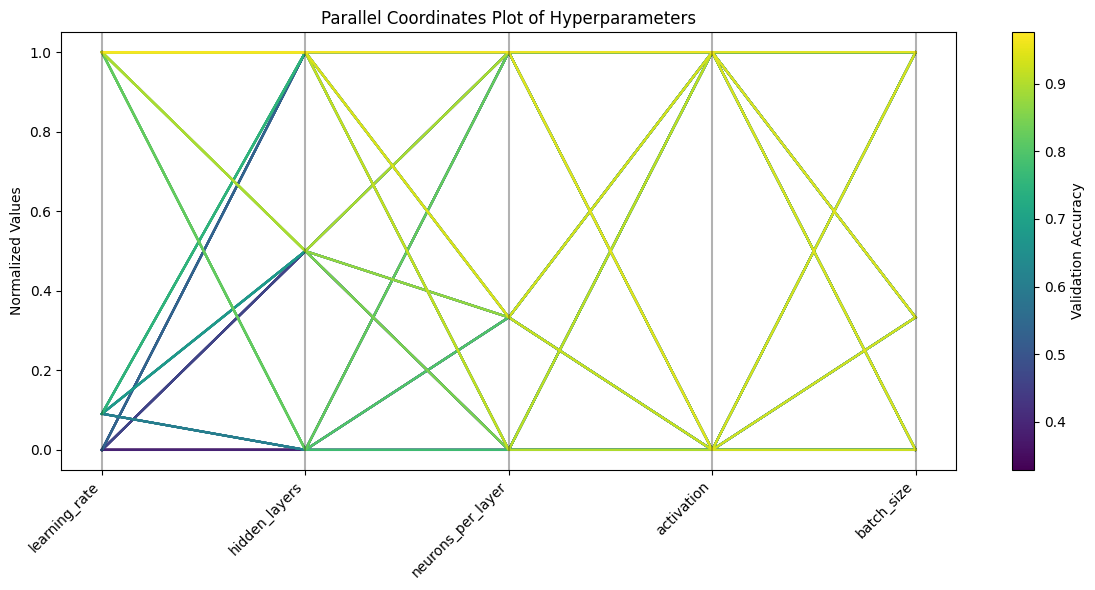

Best model hyperparameters: {'learning_rate': 0.1, 'hidden_layers': 2, 'neurons_per_layer': 10, 'activation': 'tanh', 'batch_size': 32, 'accuracy': 0.975609756097561}
Worst model hyperparameters: {'learning_rate': 0.001, 'hidden_layers': 3, 'neurons_per_layer': 20, 'activation': 'relu', 'batch_size': 128, 'accuracy': 0.32926829268292684}


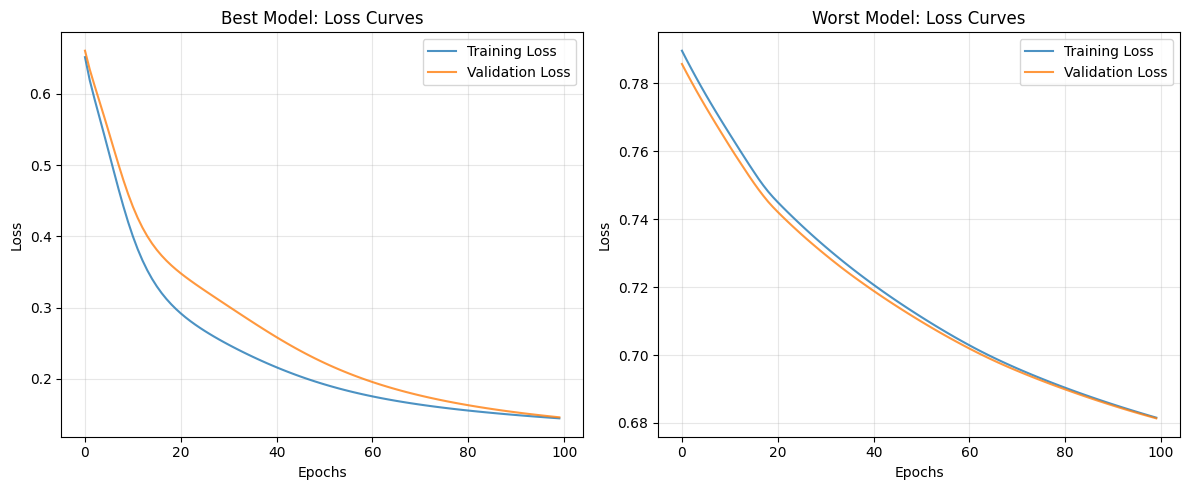

In [6]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define hyperparameter ranges
def get_hyperparameter_combinations():
    return {
        'learning_rate': [0.001, 0.01, 0.1],
        'hidden_layers': [1, 2, 3],
        'neurons_per_layer': [5, 10, 20],
        'activation': ['relu', 'tanh'],
        'batch_size': [32, 64, 128]
    }

# Step 2: Modified initialization function to handle variable architecture
def initialize_parameters(input_size, hidden_layers, neurons_per_layer, output_size):
    parameters = {}
    layer_sizes = [input_size] + [neurons_per_layer] * hidden_layers + [output_size]
    
    for l in range(1, len(layer_sizes)):
        parameters[f'W{l}'] = np.random.randn(layer_sizes[l-1], layer_sizes[l]) * np.sqrt(2/layer_sizes[l-1])
        parameters[f'b{l}'] = np.zeros((1, layer_sizes[l]))
    
    return parameters

# Step 3: Activation functions
def activation_function(Z, activation_type):
    if activation_type == 'relu':
        return np.maximum(0, Z)
    elif activation_type == 'tanh':
        return np.tanh(Z)

def activation_derivative(Z, activation_type):
    if activation_type == 'relu':
        return (Z > 0).astype(float)
    elif activation_type == 'tanh':
        return 1 - np.tanh(Z)**2

# Step 4: Forward and backward propagation with variable architecture
def forward_propagation(X, parameters, activation_type):
    cache = {'A0': X}
    L = len(parameters) // 2
    
    for l in range(1, L):
        Z = np.dot(cache[f'A{l-1}'], parameters[f'W{l}']) + parameters[f'b{l}']
        cache[f'Z{l}'] = Z
        cache[f'A{l}'] = activation_function(Z, activation_type)
    
    # Output layer with softmax
    ZL = np.dot(cache[f'A{L-1}'], parameters[f'W{L}']) + parameters[f'b{L}']
    cache[f'Z{L}'] = ZL
    cache[f'A{L}'] = softmax(ZL)
    
    return cache

def backward_propagation(X, y, cache, parameters, activation_type):
    m = y.shape[0]
    L = len(parameters) // 2
    grads = {}
    
    # Output layer
    dZ = cache[f'A{L}'] - y
    grads[f'dW{L}'] = (1/m) * np.dot(cache[f'A{L-1}'].T, dZ)
    grads[f'db{L}'] = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    
    # Hidden layers
    for l in reversed(range(1, L)):
        dA = np.dot(dZ, parameters[f'W{l+1}'].T)
        dZ = dA * activation_derivative(cache[f'Z{l}'], activation_type)
        grads[f'dW{l}'] = (1/m) * np.dot(cache[f'A{l-1}'].T, dZ)
        grads[f'db{l}'] = (1/m) * np.sum(dZ, axis=0, keepdims=True)
    
    return grads

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2
    for l in range(1, L + 1):
        parameters[f'W{l}'] -= learning_rate * grads[f'dW{l}']
        parameters[f'b{l}'] -= learning_rate * grads[f'db{l}']
    return parameters


# Step 5: Training function with all hyperparameters
def train_model_with_generalization(X_train, y_train, X_val, y_val, hyperparams):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    
    parameters = initialize_parameters(
        input_size, 
        hyperparams['hidden_layers'],
        hyperparams['neurons_per_layer'],
        output_size
    )
    
    n_batches = max(X_train.shape[0] // hyperparams['batch_size'], 1)
    train_losses, val_losses = [], []
    
    for epoch in range(100):
        epoch_loss = 0
        for batch in range(n_batches):
            start_idx = batch * hyperparams['batch_size']
            end_idx = min(start_idx + hyperparams['batch_size'], X_train.shape[0])
            
            X_batch = X_train[start_idx:end_idx]
            y_batch = y_train[start_idx:end_idx]
            
            # Forward propagation
            cache = forward_propagation(X_batch, parameters, hyperparams['activation'])
            
            # Backward propagation
            grads = backward_propagation(X_batch, y_batch, cache, parameters, hyperparams['activation'])
            
            # Update parameters
            parameters = update_parameters(parameters, grads, hyperparams['learning_rate'])
            
            # Compute batch loss
            batch_loss = compute_loss(y_batch, cache[f'A{len(parameters)//2}'])
            epoch_loss += batch_loss
        
        # Store losses every epoch
        train_cache = forward_propagation(X_train, parameters, hyperparams['activation'])
        val_cache = forward_propagation(X_val, parameters, hyperparams['activation'])
        
        train_losses.append(compute_loss(y_train, train_cache[f'A{len(parameters)//2}']))
        val_losses.append(compute_loss(y_val, val_cache[f'A{len(parameters)//2}']))
    
    val_cache = forward_propagation(X_val, parameters, hyperparams['activation'])
    val_accuracy = compute_accuracy(y_val, val_cache[f'A{len(parameters)//2}'])
    
    return val_accuracy, train_losses, val_losses


# Step 6: Hyperparameter optimization
def optimize_hyperparameters(X_train, y_train, X_val, y_val):
    hyperparams = get_hyperparameter_combinations()
    results = []
    
    # Generate all combinations
    from itertools import product
    combinations = list(product(*hyperparams.values()))
    
    for combo in combinations:
        current_params = dict(zip(hyperparams.keys(), combo))
        accuracy, train_losses, val_losses = train_model_with_generalization(
            X_train, y_train, X_val, y_val, current_params
        )
        results.append({**current_params, 'accuracy': accuracy})
    
    return pd.DataFrame(results)

# Step 7: Visualization function
def plot_parallel_coordinates(results):
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create a copy of the dataframe for plotting
    df_plot = results.copy()
    
    # Convert activation to numeric (0 for 'relu', 1 for 'tanh')
    df_plot['activation'] = pd.Categorical(df_plot['activation']).codes
    
    # Normalize numerical columns for plotting
    for col in df_plot.columns[:-1]:  # Exclude accuracy
        if df_plot[col].dtype in [np.float64, np.int64]:
            df_plot[col] = (df_plot[col] - df_plot[col].min()) / (df_plot[col].max() - df_plot[col].min())
    
    # Set up the axes
    values = range(len(df_plot.columns) - 1)
    ax.set_xticks(values)
    ax.set_xticklabels(df_plot.columns[:-1], rotation=45, ha='right')
    
    # Plot each configuration with a unique color
    for i, row in df_plot.iterrows():
        # Assign a color based on the index
        color = plt.cm.viridis(i / len(df_plot))
        ax.plot(values, row[:-1], c=color, alpha=0.5)
    
    # Add vertical lines for each attribute
    for i in values:
        ax.axvline(i, linestyle='-', color='k', alpha=0.3)
    
    ax.set_ylabel('Normalized Values')
    ax.set_title('Parallel Coordinates Plot of Hyperparameters')
    
    # Add colorbar to indicate configuration index
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=results['accuracy'].min(), vmax=results['accuracy'].max()))
    cbar = fig.colorbar(sm, ax=ax, label='Validation Accuracy')
    
    plt.tight_layout()
    plt.show()


# Load and prepare data
train_data = pd.read_excel("THA2train.xlsx")
validate_data = pd.read_excel("THA2validate.xlsx")

X_train = normalize_features(train_data[["X_0", "X_1"]].values)
y_train = pd.get_dummies(train_data["y"]).values
X_val = normalize_features(validate_data[["X_0", "X_1"]].values)
y_val = pd.get_dummies(validate_data["y"]).values

# Run optimization and plot results
results = optimize_hyperparameters(X_train, y_train, X_val, y_val)
plot_parallel_coordinates(results)

best_model = results.loc[results['accuracy'].idxmax()]
worst_model = results.loc[results['accuracy'].idxmin()]

print("Best model hyperparameters:", best_model.to_dict())
print("Worst model hyperparameters:", worst_model.to_dict())

# Train the best and worst models again to get loss values
_, best_train_losses, best_val_losses = train_model_with_generalization(X_train, y_train, X_val, y_val, best_model.to_dict())
_, worst_train_losses, worst_val_losses = train_model_with_generalization(X_train, y_train, X_val, y_val, worst_model.to_dict())

# Plot loss curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(best_train_losses, label='Training Loss', alpha=0.8)
plt.plot(best_val_losses, label='Validation Loss', alpha=0.8)
plt.title('Best Model: Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(worst_train_losses, label='Training Loss', alpha=0.8)
plt.plot(worst_val_losses, label='Validation Loss', alpha=0.8)
plt.title('Worst Model: Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


#### Best Performing Model
The best model achieved an accuracy of 97.56% with the following hyperparameters:
- Learning rate: 0.1
- Hidden layers: 2
- Neurons per layer: 10
- Activation function: tanh
- Batch size: 32
Analyzing the loss curves:
- Both training and validation losses decrease steadily and converge.
- The final training and validation losses are very close, indicating good generalization.
- There is no significant gap between training and validation loss, suggesting the model is neither overfitting nor underfitting.
#### Worst Performing Model
The worst model achieved an accuracy of 32.93% with the following hyperparameters:
- Learning rate: 0.001
- Hidden layers: 3
- Neurons per layer: 20
- Activation function: relu
- Batch size: 128
Examining the loss curves:
- The training loss decreases very slowly, while the validation loss remains high and unstable.
- There is a large gap between training and validation loss, indicating poor generalization.
- The model is likely underfitting due to the slow learning progress and high losses on both sets.
#### Generalization Performance
- The best model demonstrates excellent generalization, with similar performance on both training and validation sets. This suggests it has learned the underlying patterns in the data without memorizing noise.
- The worst model shows signs of severe underfitting. The high learning rate, combined with a complex architecture (3 hidden layers with 20 neurons each), may have led to unstable learning. The large batch size (128) could also contribute to slower convergence.

<h2> Bonus exercise. Regularization. </h2>

Now we add L1 and L2 regularization techniques to the neural network we previously developed. We take the best hyperparameters from the section B.4. and use them to train the network with each regularization type. 


B.4. Best model hyperparameters: {'learning_rate': 0.01, 'hidden_layers': 1, 'neurons_per_layer': 5, 'activation': 'tanh', 'batch_size': 64, 'accuracy': 0.975609756097561}


Then, we generate and include a confusion matrix for each model to visualize performance.

### Implementation Steps
1. Define Hyperparameter Search Space
2. Implement Grid Search or Random Search
3. Train and Evaluate Models
4. Create Parallel Coordinates Plot
5. Analyze Best and Worst Performing Models
6. Plot Loss Functions for Best and Worst Models
7. Discuss Results

L1 Regularization:
Validation Accuracy: 0.9390


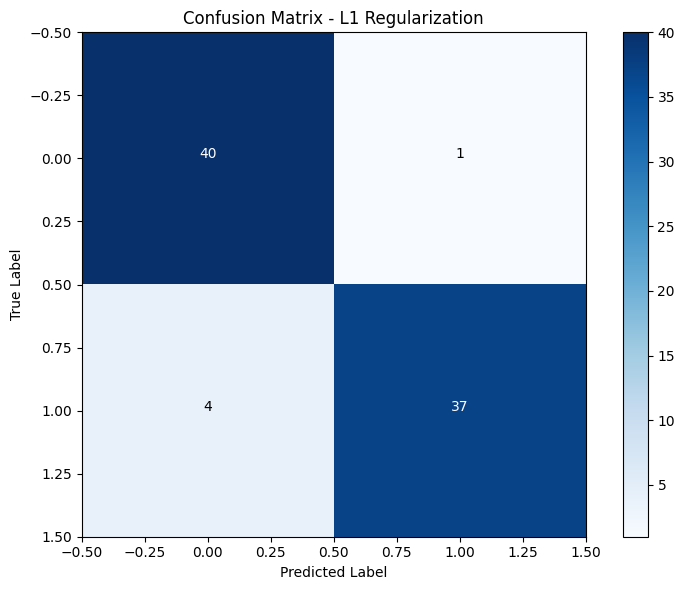


Confusion Matrix Analysis for Confusion Matrix - L1 Regularization:
True Negatives: 40
False Positives: 1
False Negatives: 4
True Positives: 37

Precision Metric: 0.9737

L2 Regularization:
Validation Accuracy: 0.7927


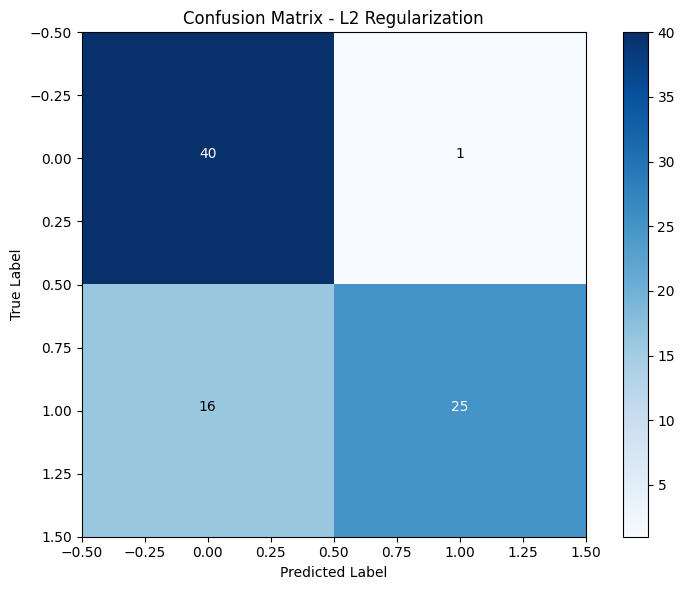


Confusion Matrix Analysis for Confusion Matrix - L2 Regularization:
True Negatives: 40
False Positives: 1
False Negatives: 16
True Positives: 25

Precision Metric: 0.9615


In [7]:
# Modify loss function to include regularization
def compute_loss_with_regularization(y_true, y_pred, parameters, reg_type, lambda_reg):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    cross_entropy_loss = -np.mean(np.sum(y_true * np.log(y_pred), axis=1))
    
    # Add regularization term
    reg_loss = 0
    if reg_type == "L1":
        reg_loss = lambda_reg * sum([np.sum(np.abs(parameters[f"W{l}"])) for l in range(1, len(parameters) // 2 + 1)])
    elif reg_type == "L2":
        reg_loss = lambda_reg * sum([np.sum(np.square(parameters[f"W{l}"])) for l in range(1, len(parameters) // 2 + 1)])
    
    return cross_entropy_loss + reg_loss

# Modify gradients for regularization
def update_parameters_with_regularization(parameters, grads, learning_rate, reg_type, lambda_reg):
    for l in range(1, len(parameters) // 2 + 1):
        if reg_type == "L1":
            grads[f"dW{l}"] += lambda_reg * np.sign(parameters[f"W{l}"])
        elif reg_type == "L2":
            grads[f"dW{l}"] += 2 * lambda_reg * parameters[f"W{l}"]
        
        # Update parameters
        parameters[f"W{l}"] -= learning_rate * grads[f"dW{l}"]
        parameters[f"b{l}"] -= learning_rate * grads[f"db{l}"]
    return parameters

# Train model with regularization
def train_model_with_regularization(X_train, y_train, X_val, y_val, hyperparams, reg_type, lambda_reg):
    input_size = X_train.shape[1]
    output_size = y_train.shape[1]
    parameters = initialize_parameters(input_size, hyperparams['hidden_layers'], hyperparams['neurons_per_layer'], output_size)
    
    train_losses, val_losses = [], []
    for epoch in range(10000):
        # Forward pass
        cache = forward_propagation(X_train, parameters, hyperparams['activation'])
        
        # Compute loss with regularization
        train_loss = compute_loss_with_regularization(y_train, cache[f"A{len(parameters)//2}"], parameters, reg_type, lambda_reg)
        
        # Backward pass
        grads = backward_propagation(X_train, y_train, cache, parameters, hyperparams['activation'])
        
        # Update parameters with regularization
        parameters = update_parameters_with_regularization(parameters, grads, hyperparams['learning_rate'], reg_type, lambda_reg)
        
        # Validation loss
        val_cache = forward_propagation(X_val, parameters, hyperparams['activation'])
        val_loss = compute_loss_with_regularization(y_val, val_cache[f"A{len(parameters)//2}"], parameters, reg_type, lambda_reg)
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    
    return parameters, train_losses[-1], val_losses[-1]

# Evaluate performance and generate confusion matrix
def evaluate_model(X_val, y_val, parameters, activation='relu'):
    val_cache = forward_propagation(X_val, parameters, activation)
    y_pred = np.argmax(val_cache[f"A{len(parameters)//2}"], axis=1)
    y_true = np.argmax(y_val, axis=1)
    
    # Confusion matrix
    cm = np.zeros((2, 2), dtype=int)
    for true_label, pred_label in zip(y_true, y_pred):
        cm[true_label][pred_label] += 1
    
    accuracy = np.trace(cm) / np.sum(cm)
    return accuracy, cm

def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    print(f"\nConfusion Matrix Analysis for {title}:")
    print(f"True Negatives: {cm[0,0]}")
    print(f"False Positives: {cm[0,1]}")
    print(f"False Negatives: {cm[1,0]}")
    print(f"True Positives: {cm[1,1]}")

    precision = cm[1,1] / (cm[1,1] + cm[0,1]) if (cm[1,1] + cm[0,1]) > 0 else 0
    print(f"\nPrecision Metric: {precision:.4f}")

# Train and evaluate models with L1 and L2 regularization
hyperparams = {'learning_rate': 0.1,
               'hidden_layers': 1,
               'neurons_per_layer': 10,
               'activation': 'tanh',
               'batch_size': 32}

lambda_reg = 0.01

# Train with L1 Regularization
parameters_L1, train_loss_L1, val_loss_L1 = train_model_with_regularization(X_train, y_train,
                                                                            X_val, y_val,
                                                                            hyperparams,
                                                                            "L1", lambda_reg)
accuracy_L1, cm_L1 = evaluate_model(X_val, y_val, parameters_L1, activation='tanh')

# Train with L2 Regularization
parameters_L2, train_loss_L2, val_loss_L2 = train_model_with_regularization(X_train, y_train,
                                                                            X_val, y_val,
                                                                            hyperparams,
                                                                            "L2", lambda_reg)
accuracy_L2, cm_L2 = evaluate_model(X_val, y_val, parameters_L2, activation='tanh')

# Print results
print("L1 Regularization:")
print(f"Validation Accuracy: {accuracy_L1:.4f}")
plot_confusion_matrix(cm_L1, "Confusion Matrix - L1 Regularization")

print("\nL2 Regularization:")
print(f"Validation Accuracy: {accuracy_L2:.4f}")
plot_confusion_matrix(cm_L2, "Confusion Matrix - L2 Regularization")


#### Performance Comparison
L1 Regularization:
- Validation Accuracy: 93.90%
- Confusion Matrix:
    - True Negatives: 40
    - False Positives: 1
    - False Negatives: 4
    - True Positives: 37
    - Precision: 0.9737

L2 Regularization:
- Validation Accuracy: 79.27%
- Confusion Matrix:
    - True Negatives: 40
    - False Positives: 1
    - False Negatives: 16
    - True Positives: 25
    - Precision: 0.9615
#### Discussion
1. Classification Accuracy:
    - L1 regularization outperforms L2 in terms of overall accuracy (93.90% vs 79.27%). This suggests that L1 regularization is more effective for this particular dataset and model architecture.
2. Confusion Matrix Analysis:
    - Both models have the same number of True Negatives (40) and False Positives (1), indicating good performance on the negative class.
    - L1 regularization has fewer False Negatives (4 vs 16) and more True Positives (37 vs 25) compared to L2, showing better performance on the positive class.
    - L1 regularization achieves a better balance between classes, while L2 seems to be biased towards the negative class.
3. Precision:
    - Both models have high precision, with L1 slightly outperforming L2 (0.9737 vs 0.9615). This indicates that when either model predicts a positive class, it's highly likely to be correct.
4. Weight Reduction:
    - Without access to the actual weight values, we can infer based on the regularization properties:
    - L1 Regularization: Known for producing sparse models, L1 likely reduced many weights to exactly zero or very close to zero. This feature selection property of L1 might explain its better performance, as it could have identified the most important features for classification.
    - L2 Regularization: While L2 doesn't typically produce exact zeros, it tends to reduce all weights more uniformly. This might have over-smoothed the decision boundary, leading to lower accuracy but still maintaining good precision.
5. Exact Zero Weights:
    - To determine the exact number of zero weights, we would need to examine the model parameters directly. However, we can expect:
    - L1 Regularization: Likely produced some weights that are exactly zero, contributing to its better performance through implicit feature selection.
    - L2 Regularization: Probably has very few, if any, exact zero weights, instead having many small but non-zero values.


**In conclusion**, for this specific problem, L1 regularization appears to be more effective, likely due to its ability to perform feature selection and produce a sparser model. This suggests that the classification task may depend on a subset of strong features, which L1 regularization is better at identifying and preserving.


### D. Peer Review paragraph

As group members, we believe our work distribution for THA2 was fair and efficient. We decided to split the tasks based on our individual strengths and interests. 
- Esraa took responsibility for Part A, focusing on implementing the MLP from scratch and conducting the initial training and analysis. 
- Maksym handled Part B, diving deep into hyperparameter optimization and visualization techniques. 
- Faten tackled the Bonus exercise, implementing L1 and L2 regularization and analyzing their effects on the model's performance. 

While we worked on our assigned sections independently, we maintained constant communication through regular meetings and online chats to discuss challenges, share insights, and ensure consistency across all parts of the assignment. We used github to coordinate version management. We also collaborated on integrating our individual contributions into a cohesive final report. 

Given the equal distribution of workload and the high quality of each member's contribution, we believe all group members deserve equal grades for this assignment. This approach allowed us to leverage our individual strengths while ensuring a comprehensive understanding of the entire project for all team members.